In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from collections import Counter
# import spacy
# nlp = spacy.load('en_core_web_sm')

# from spacy.lang.en import English
# tokenizer = English().Defaults.create_tokenizer(nlp)


# def my_spacy_tokenizer(doc):
#     # TODO: need to add a phase to break -- offsets and strip white space.
#     tokens = tokenizer(doc)
#     return([token.text for token in tokens])


# Dataset statistics on distribution of idf & vocab relative to number examples

Datasets have fairly similar vocab size to number of example utterances ratios, but crisischats' is roughly double, indicating a large vocab relative to dataset size. 

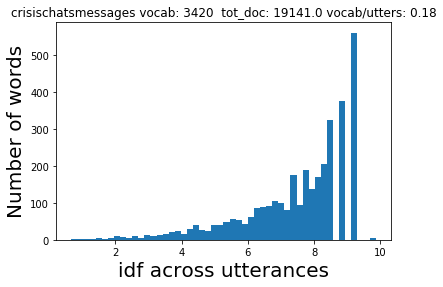

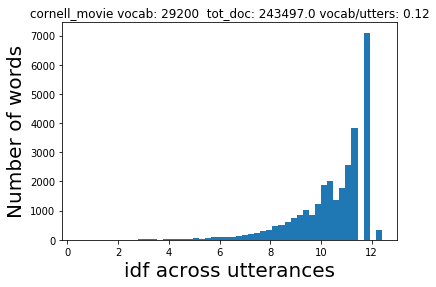

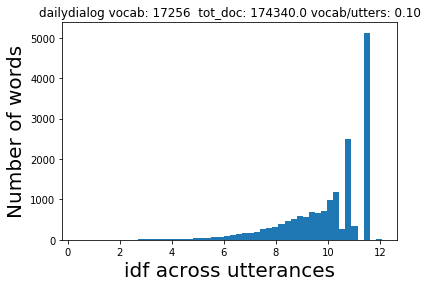

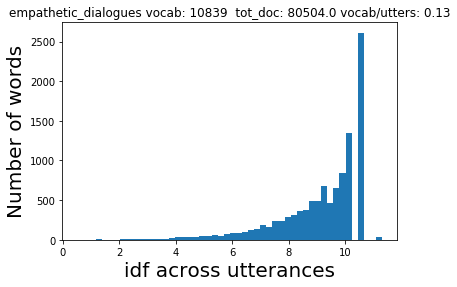

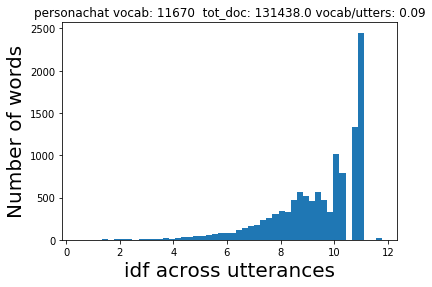

In [130]:
tasks = ['crisischatsmessages', 'cornell_movie', 'dailydialog', 'empathetic_dialogues', 'personachat']
for task in tasks:
    
    tot_doc = open('/data/odemasi/packages/ParlAI/tmp/%s/dict_minfreq_2.tot_doc' % task, 'r').readline()
    tot_doc = float(tot_doc.strip('\n'))
    lines = open('/data/odemasi/packages/ParlAI/tmp/%s/dict_minfreq_2.doc_freq' % task, 'r').readlines()
    doc_freq = [float(x.split('\t')[1].strip('\n')) for x in lines[4:]] # strip off special tokens at front
    
    plt.hist([np.log(tot_doc/x) for x in doc_freq], bins=50)
    plt.title('%s vocab: %s  tot_doc: %s vocab/utters: %.2f' % (task, len(doc_freq), tot_doc, len(doc_freq)/float(tot_doc)))
#     plt.xlim([-1, 11])
    plt.xlabel('idf across utterances', fontsize=20)
    plt.ylabel('Number of words', fontsize=20)
    plt.show()

# Load crowdworker input data

In [22]:
batch_name = 'batches/Batch_3622867_batch_results.csv'

raw_df = pd.read_csv(batch_name)
turk_df = raw_df

In [5]:
raw_df[:3]

,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,...,Answer.rel_3,Answer.rel_4,Answer.rel_5,Answer.rel_6,Answer.rel_7,Answer.rel_8,Answer.rel_9,Answer.rel_warmup,Approve,Reject
0,3UUSLRKAUMNRYILUD069OZX66TLD7T,33V96X0SXRP0GOK7AUJDZXHJQE1Z1Y,"Select the most interesting, relevant, and ove...",Select the most interesting and relevance dial...,"labeling, dialogue",$1.00,Sat Apr 27 10:21:01 PDT 2019,3,BatchId:3622867;OriginalHitTemplateId:928390912;,3600,...,1,1,1,1,1,1,1,1,NaN,NaN
1,3UUSLRKAUMNRYILUD069OZX66TLD7T,33V96X0SXRP0GOK7AUJDZXHJQE1Z1Y,"Select the most interesting, relevant, and ove...",Select the most interesting and relevance dial...,"labeling, dialogue",$1.00,Sat Apr 27 10:21:01 PDT 2019,3,BatchId:3622867;OriginalHitTemplateId:928390912;,3600,...,3,1,1,2,1,2,3,1,NaN,NaN
2,3UUSLRKAUMNRYILUD069OZX66TLD7T,33V96X0SXRP0GOK7AUJDZXHJQE1Z1Y,"Select the most interesting, relevant, and ove...",Select the most interesting and relevance dial...,"labeling, dialogue",$1.00,Sat Apr 27 10:21:01 PDT 2019,3,BatchId:3622867;OriginalHitTemplateId:928390912;,3600,...,3,1,1,2,3,1,2,1,NaN,NaN


In [219]:
list(raw_df.columns)

['HITId',
 'HITTypeId',
 'Title',
 'Description',
 'Keywords',
 'Reward',
 'CreationTime',
 'MaxAssignments',
 'RequesterAnnotation',
 'AssignmentDurationInSeconds',
 'AutoApprovalDelayInSeconds',
 'Expiration',
 'NumberOfSimilarHITs',
 'LifetimeInSeconds',
 'AssignmentId',
 'WorkerId',
 'AssignmentStatus',
 'AcceptTime',
 'SubmitTime',
 'AutoApprovalTime',
 'ApprovalTime',
 'RejectionTime',
 'RequesterFeedback',
 'WorkTimeInSeconds',
 'LifetimeApprovalRate',
 'Last30DaysApprovalRate',
 'Last7DaysApprovalRate',
 'Input.msg1_0',
 'Input.msg2_0',
 'Input.resp_1_0',
 'Input.model_1_0',
 'Input.resp_2_0',
 'Input.model_2_0',
 'Input.resp_3_0',
 'Input.model_3_0',
 'Input.msg1_1',
 'Input.msg2_1',
 'Input.resp_1_1',
 'Input.model_1_1',
 'Input.resp_2_1',
 'Input.model_2_1',
 'Input.resp_3_1',
 'Input.model_3_1',
 'Input.msg1_2',
 'Input.msg2_2',
 'Input.resp_1_2',
 'Input.model_1_2',
 'Input.resp_2_2',
 'Input.model_2_2',
 'Input.resp_3_2',
 'Input.model_3_2',
 'Input.msg1_3',
 'Input.msg2_

In [8]:
raw_df.loc[0,'Input.model_3_0']

'empathetic_dialogues seq2seq idf'

## Look at evaluation of the warmup question: 

In [228]:
for colname in ['Answer.int_warmup', 'Answer.rel_warmup', 
                'Answer.check_int_warmup', 'Answer.check_rel_warmup', 
                'Answer.rank_warmup_1', 'Answer.rank_warmup_2', 'Answer.rank_warmup_3']:
    
    print(colname,'\t', Counter(raw_df[colname]))

Answer.int_warmup 	 Counter({3: 157, 2: 59, 1: 24})
Answer.rel_warmup 	 Counter({1: 223, 2: 11, 3: 6})
Answer.check_int_warmup 	 Counter({nan: 227, 'on': 13})
Answer.check_rel_warmup 	 Counter({nan: 239, 'on': 1})
Answer.rank_warmup_1 	 Counter({1: 207, 2: 25, 3: 8})
Answer.rank_warmup_2 	 Counter({2: 120, 3: 114, 1: 6})
Answer.rank_warmup_3 	 Counter({3.0: 117, 2.0: 95, 1.0: 27, nan: 1})


## Justifications of warmup

In [235]:
print( '\n'.join(raw_df['Answer.Justified Answer'].values))

It just felt right
It sounded natural and had good sentence structure.
Most related
Again, it's the only well-formed, relevant response.
the tennis response was irrelevant but somewhat interesting.
Most related
It just felt right
Because I am a Dallas fan also and I think that is cool.
It makes the most sense.
The response makes sense and has good sentence structure.
direct response to person
It just felt right
The first is the only one that is relevant. The second the sentence structure is poor. The third tennis is mentioned, which just seems weird to me when they were talking about football originally.
It made the most sense of the bunch. Response 3 mentioned an entirely different sport so that was out. Response 2 doesn't make sense grammatically.
by what was offered by the person. it was said that the favorite team was the cowboys. My answer was the one which would directly respond to that comment
It's provides more information and it's just more interesting than just saying that's 

In [240]:
# print( '\n'.join(map(str, raw_df['Answer.rank_warmup_3'].values)))

## Justification of final

In [233]:
print(raw_df['Answer.Justified Answer Final'].values)

['It just felt right'
 'The sentence about cooking was also good but I liked the comic books one better. They both sounded natural.'
 'It answers the question correctly.'
 "It's something someone would actually say in that situation"
 'It made sense in the context.' "It's the most reassuring."
 'It just felt right' 'I thought the other 2 responses made no sense.'
 'It was the only response that made sense.'
 'None seemed very relevant but it kind of makes sure that the chatbot would reassure someone if the person seemed distressed'
 'at least it is slightly related' 'It just felt right'
 "The other two responses did not fit with what was already said. Even the one I chose as the best didn't fit as the bot asked if the person is a millionaire now, and the person responds with no. So asking what happened doesn't really even make sense. Asking about how long makes even less sense though."
 "It was the only one that made sense within the context of person 1's response."
 'I went with that 

## Optional feedback: 

In [234]:
print( raw_df['Answer.optionalfeedback'].values)
#  'A lot of these are non-sensical responses.  It makes it hard to "rank" them'
#  'please define ~~ for future workers.' 
#  'I see you got rid of the "ungrammatical" checkbox. Yeah, that wasn\'t working out too well before. Good decision.'


['{}' '{}' '{}'
 "Some of these repeat questions that are already answered.  I mean, they're relevant to the conversation, technically, but they're kind of not....if that makes sense."
 'Even if you choose none are interesting/relevant, it forces you to choose a bubble.'
 '{}' '{}' 'Very interesting survey. Hope I did it correctly. Thank you.'
 '{}' '{}' '{}' '{}'
 "Most of the response just didn't seem to fit well with what was already said. I tried to do what the instructions said, but it wasn't easy."
 '{}' 'none' '{}' '{}' '{}' 'nice' nan '{}' '{}' '{}' '{}' '{}' '{}' '{}'
 '{}' '{}' 'Nice survey' '{}' '{}' '{}' '{}' 'n' '{}'
 'That was fun, thanks! I hope I did well.' '{}' '{}' 'thanx' '{}' '{}'
 '{}' '{}' '{}' '{}'
 'Thank you for the opportunity to take part in this task.' '{}' '{}' '{}'
 '{}' '{}' '{}' '{}' '{}' '{}' '{}' '{}' '{}' '{}' '{}' '{}'
 'I was not sure if I could pick the most relevant and most interesting for the same response.'
 '{}' '{}' 'Thank you for the opportu

## check warmup question

## Look at justifications

In [20]:
# [type(x) == str for x in raw_df['Answer.check_int_9']]

In [12]:
raw_df[['Answer.check_int_9',
'Answer.check_int_warmup',
'Answer.check_rel_0',
'Answer.int_0',
'Answer.rank_0_1', # example_option
'Answer.rel_0']].loc[0]

Answer.check_int_9         NaN
Answer.check_int_warmup    NaN
Answer.check_rel_0         NaN
Answer.int_0                 2
Answer.rank_0_1              1
Answer.rel_0                 1
Name: 0, dtype: object

# Parse data into convenient data frame

In [197]:

model_order = ['s2s', 'transformer', 'lm']
method_order = ['vanilla', 'idf', 'swapping']
choice_df = []
# grammar_df = []
for i in turk_df.index:
    row = turk_df.loc[i]
    hit_num = i
    worker_id = row['WorkerId']
    for ex in range(10): # given to each turker in a single HIT
        
        option_to_method = {}
        method_to_rank = {}
        method_to_resp = {}
#         method_to_gram = {}
        for option in range(1, 4):
            model_pieces = row['Input.model_%s_%s' % (option, ex)].split(' ')
            if len(model_pieces) == 2: 
                dataset, second = model_pieces
                if second not in ['s2s', 'transformer']:
                    method = second
                    model = 's2s' 
                else: 
                    method = 'vanilla'
                    model = second
            else: 
                dataset, model, method = model_pieces
                
            option_to_method[option] = method
            method_to_rank[method] = row['Answer.rank_%s_%s' % (ex, option)]
            
            method_to_resp[method] = row['Input.resp_%s_%s' % (option, ex)]
#             method_to_gram[method] = np.isnan(row['Answer.gram_%s_%s' % (ex, option)])
            
        most_interesting = option_to_method[row['Answer.int_%s' % (ex,)]]
        most_relevant = option_to_method[row['Answer.rel_%s' % (ex,)]]
        none_int = type(row['Answer.check_int_%s'% (ex,)]) == str
        none_rel = type(row['Answer.check_rel_%s'% (ex,)]) == str
        message1 = row['Input.msg1_%s' % (ex,)]
        message2 = row['Input.msg2_%s' % (ex,)]
        
        
        choice_df.append([hit_num, worker_id, dataset, model, most_interesting, most_relevant, \
                          message1, message2, none_int, none_rel] + \
                         [method_to_rank[m] for m in method_order] + \
                         [method_to_resp[m] for m in method_order]
                        )

choice_df = pd.DataFrame(choice_df, columns = ['hit_num', 'worker_id', 'dataset', 'model', \
                                               'most_int', 'most_rel', \
                                               'message1', 'message2', \
                                               'none_int', 'none_rel']\
                                             + method_order \
                                             + ['resp_%s' % m for m in method_order])

choice_df['context'] = choice_df['message1'] + choice_df['message2']


In [198]:
choice_df[:3]

,hit_num,worker_id,dataset,model,most_int,most_rel,message1,message2,none_int,none_rel,vanilla,idf,swapping,resp_vanilla,resp_idf,resp_swapping,context
0,0,A1PUHCEBSOWETV,empathetic_dialogues,seq2seq,vanilla,swapping,~~,i did something really foolish at the grocery ...,False,False,2,3,1,why ?,oh no :( what happened ?,what did you do ?,~~i did something really foolish at the grocer...
1,0,A1PUHCEBSOWETV,cornell_movie,seq2seq,idf,vanilla,do you have a baby?,no... the closest...,False,False,1,2,3,yes .,i do n't know ...,no ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !...,do you have a baby?no... the closest...
2,0,A1PUHCEBSOWETV,personachat,transformer,idf,vanilla,what can i say ? i am amazing lol,its almost as cool as lord of the rings . have...,False,False,1,2,3,i do not have any kids,that is cool ! what kind of music do you like ?,"no , but i do not watch much tv much tv much t...",what can i say ? i am amazing lolits almost as...


# Summary statistics on all HIT input

In [75]:
print('Most interesting: ', Counter(choice_df['most_int']))
print('Most relevant: ', Counter(choice_df['most_rel']))
print('Percent of examples where int==rel: %.2f%%' % (100.0*np.sum(choice_df['most_int'] == choice_df['most_rel']) \
                                  / float(choice_df['most_rel'].shape[0]),))

print('Fraction of examples where none interesting: %.2f' % choice_df['none_int'].mean())
print('Fraction of examples where none relevant: %.2f' % choice_df['none_rel'].mean())

Most interesting:  Counter({'idf': 849, 'swapping': 847, 'vanilla': 704})
Most relevant:  Counter({'vanilla': 961, 'swapping': 756, 'idf': 683})
Percent of examples where int==rel: 24.58%
Fraction of examples where none interesting: 0.14
Fraction of examples where none relevant: 0.08


# Consider times model gets a rank (consider all input individually)
If a method gets a majority of rank 1 votes (for best message overall), it's usually vanilla. Idf and swapping split places 2 and 3

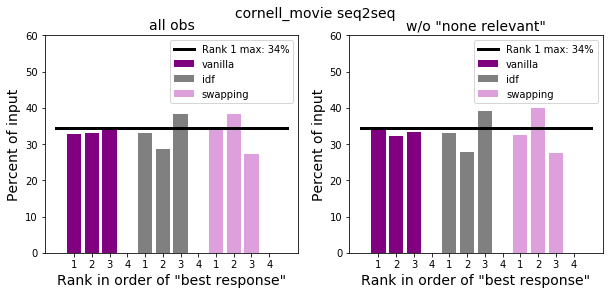

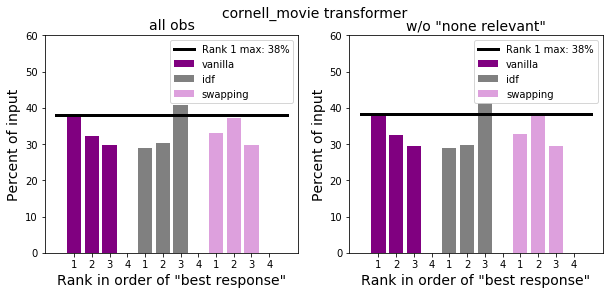

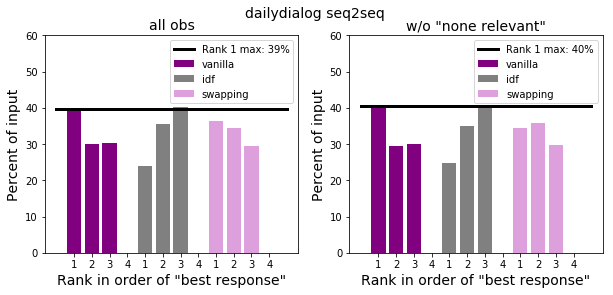

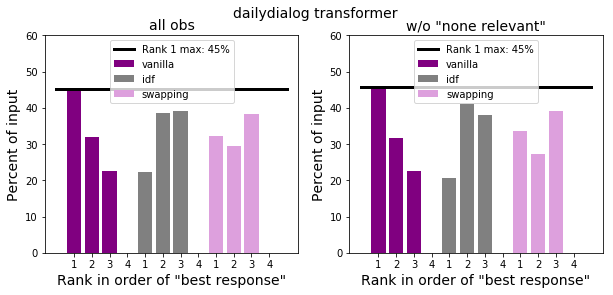

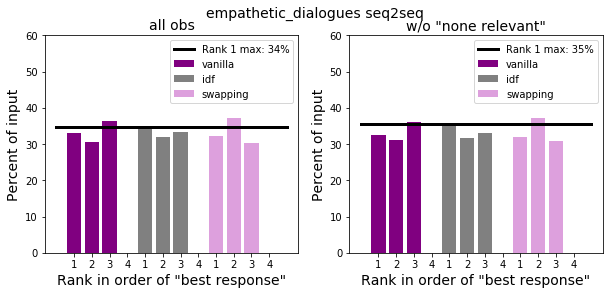

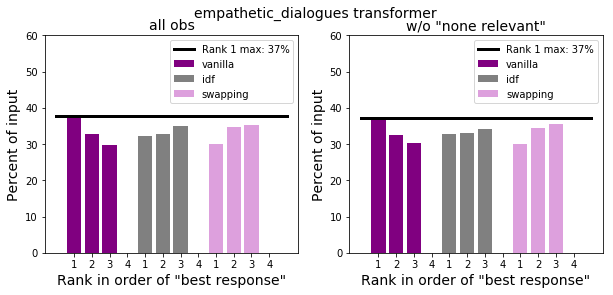

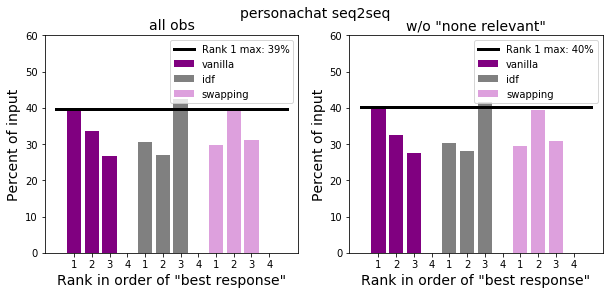

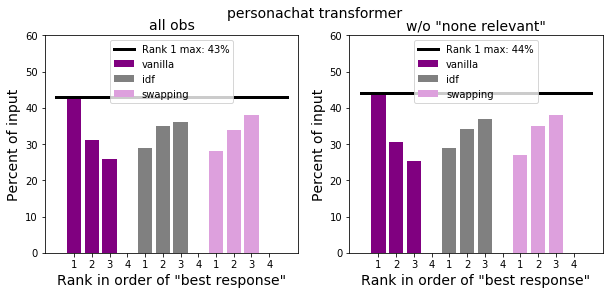

In [214]:
colors = ['purple', 'grey', 'plum']


for (dataset, model), setting_df in choice_df.groupby(['dataset', 'model']):
    
    some_relevant = ~setting_df['none_rel']
    
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    for name, df in [('all obs', setting_df), 
                    ('w/o "none relevant"', setting_df[some_relevant])]:

        N = float(df.shape[0])
        
        if name == 'all obs':
            use_ax = ax[0]
        else: 
            use_ax = ax[1]
            
        method_max = 0
        for m, method in enumerate(method_order):
            
            for r in range(3):
                perc_rank = 100.*np.sum(df[method] == (r+1))/N

                if r == 0:
                    method_max = np.max((method_max, perc_rank))
                    use_ax.bar(m*4+r, perc_rank, color=colors[m], label=method)
                else:
                    use_ax.bar(m*4+r, perc_rank, color=colors[m])
        
        use_ax.set_xticks(np.arange(12))
        use_ax.set_xticklabels(1+np.mod(np.arange(12),4))
        use_ax.plot([-1,12], [method_max, method_max],'k', linewidth=3, label='Rank 1 max: %d%%'%method_max)
        use_ax.legend()
        use_ax.set_ylim([0, 60])
        use_ax.set_title(name, fontsize=14)
        use_ax.set_ylabel('Percent of input', fontsize=14)
        use_ax.set_xlabel('Rank in order of "best response"', fontsize=14)
    
    plt.suptitle('%s %s' % (dataset, model), fontsize=14)
    plt.show()
        

# Considering only examples that get a majority of "best" rank

If we only consider examples where an method is ranked # 1 best overall, we see vanilla win and unclear difference between idf and swapping. 


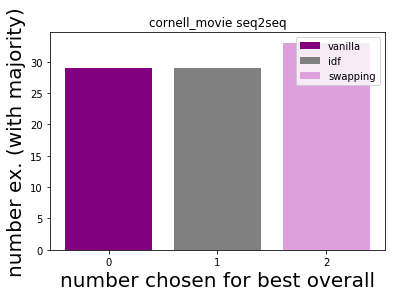

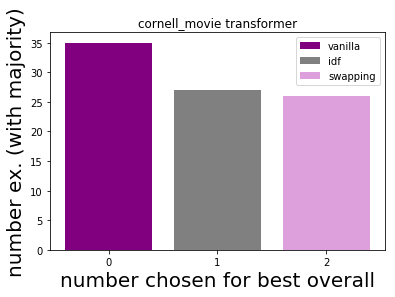

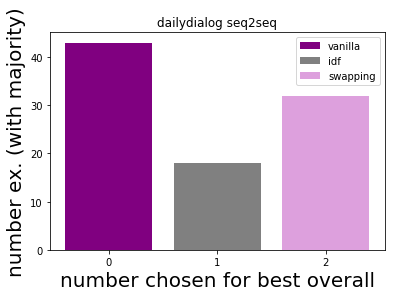

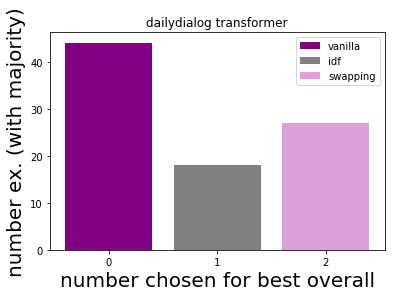

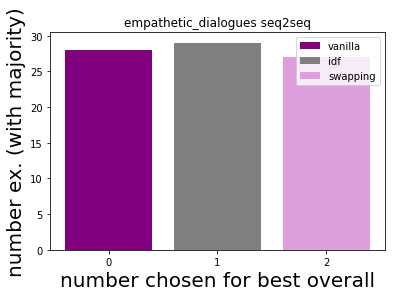

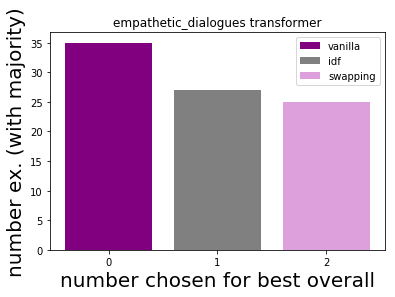

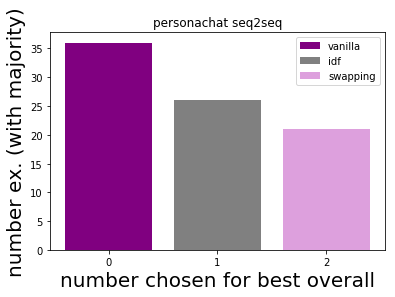

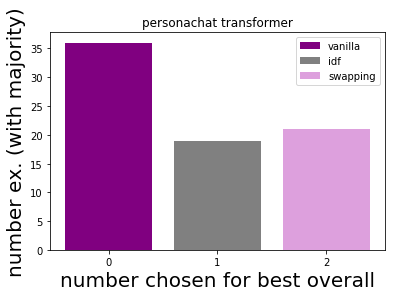

In [216]:
colors = ['purple', 'grey', 'plum']

for (dataset, model), setting_df in choice_df.groupby(['dataset', 'model']):
    
    best_choice = []
    for context, df in setting_df.groupby('context'):
        
        rank_votes = (df[['vanilla', 'idf', 'swapping']] == 1).sum()
        if rank_votes.max() >= 2:
            best_choice.append(rank_votes[rank_votes == rank_votes.max()].index[0])
            
    c = Counter(best_choice)
    for i in range(len(method_order)):
        plt.bar(i, c[method_order[i]], label=method_order[i], color=colors[i])
        
    plt.xticks(np.arange(3))
    plt.legend(loc='best')
    plt.xlabel('number chosen for best overall', fontsize=20)
    plt.ylabel('number ex. (with majority)', fontsize=20)
    plt.title('%s %s' % (dataset, model))
    plt.show()
    

# Worker agreement on interestingness & relevance
There is considerable disagreement amoung workers, but it varies between datasets. 

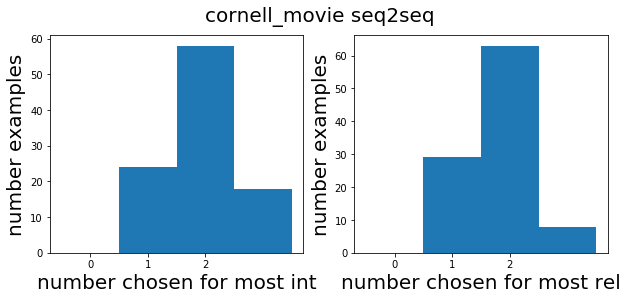

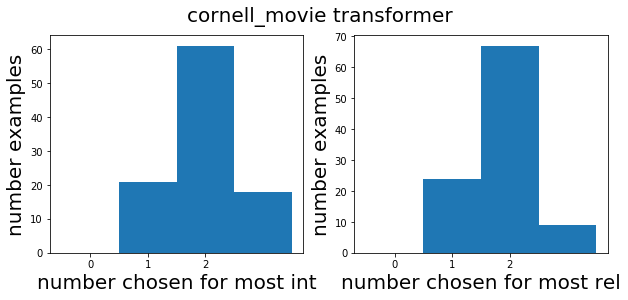

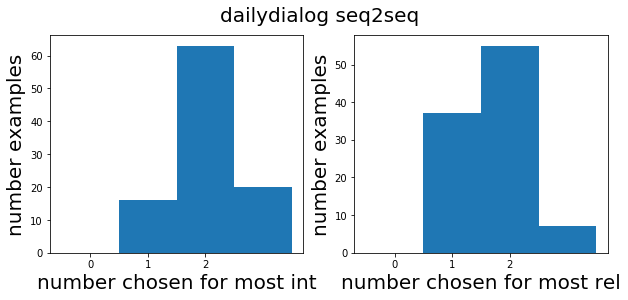

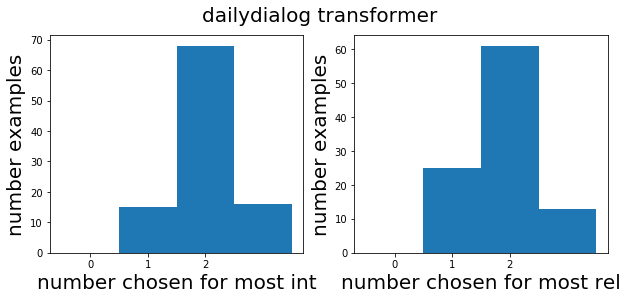

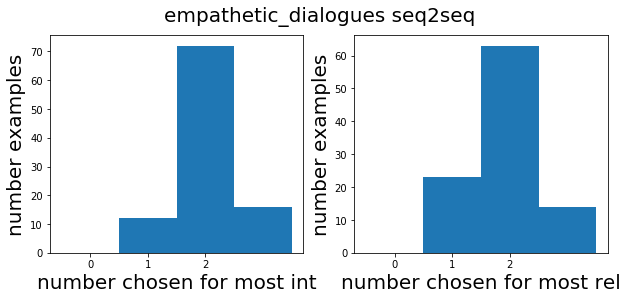

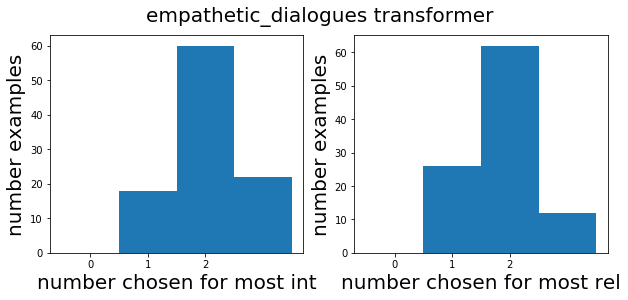

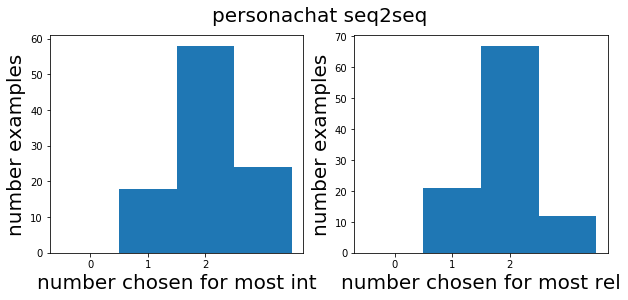

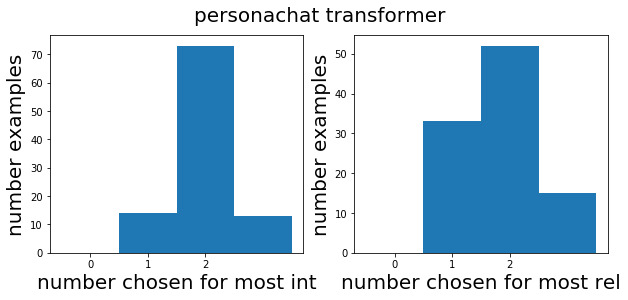

In [142]:
for (dataset, model), setting_df in choice_df.groupby(['dataset', 'model']):
    
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    
    num_most_int = []
    num_most_rel = []
    for context, df in setting_df.groupby('context'):
        num_most_int.append(len(df['most_int'].unique()))
        num_most_rel.append(len(df['most_rel'].unique()))

    ax[0].hist(num_most_int, bins=np.arange(5)-.5)
    ax[0].set_xticks(np.arange(3))
    ax[0].set_xlabel('number chosen for most int', fontsize=20)
    ax[0].set_ylabel('number examples', fontsize=20)
#     ax[0].set_title('%s %s' % (dataset, model), fontsize=20)
#     plt.show()

    ax[1].hist(num_most_rel, bins=np.arange(5)-.5)
    ax[1].set_xlabel('number chosen for most rel', fontsize=20)
    ax[1].set_ylabel('number examples', fontsize=20)
#     ax[1].set_title('%s %s' % (dataset, model), fontsize=20)
    ax[1].set_xticks(np.arange(3))
    plt.suptitle('%s %s' % (dataset, model), fontsize=20)
    plt.show()

# Look at how often a method is chosen for most relevant/interesting. 

cornell_movie seq2seq


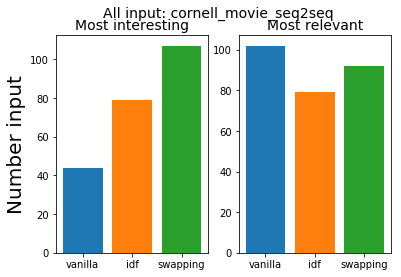

cornell_movie transformer


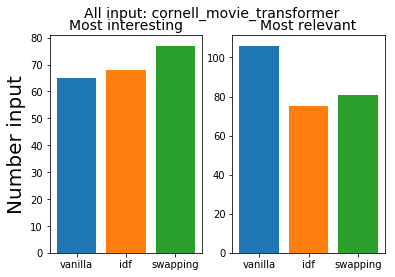

dailydialog seq2seq


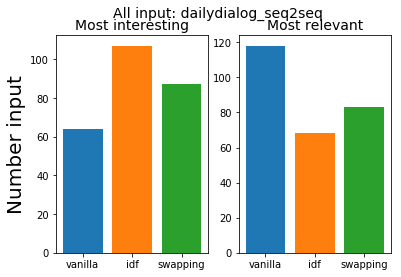

dailydialog transformer


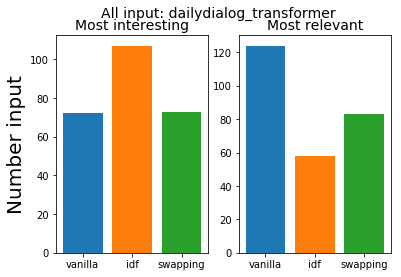

empathetic_dialogues seq2seq


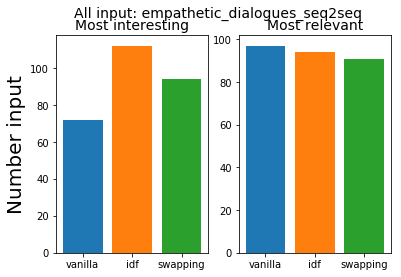

empathetic_dialogues transformer


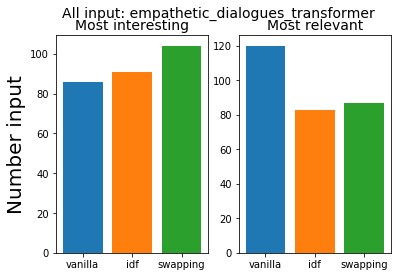

personachat seq2seq


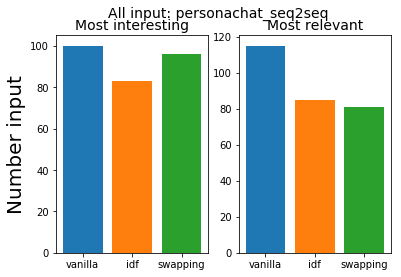

personachat transformer


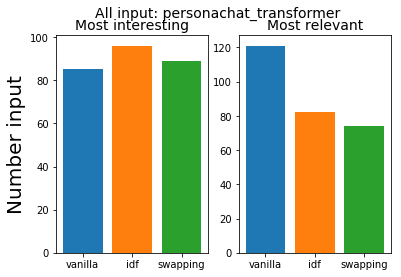

In [212]:
for (dataset, model), setting_df in choice_df.groupby(['dataset', 'model']):
    
    some_int = (~setting_df['none_int'])
    some_rel = (~setting_df['none_rel']) 
    
    int_df = setting_df[some_int]
    rel_df = setting_df[some_rel]
    
    
    print(dataset, model)
    print('=========')
    data_model_key = '%s_%s' % (dataset, model)
    
    fig, ax = plt.subplots(1, 2)
    for m, method in enumerate(method_order): 
        ax[0].bar(m, np.sum(int_df['most_int'] == method))
        ax[1].bar(m, np.sum(rel_df['most_rel'] == method))
    
    
    ax[0].set_xticks(np.arange(3))
    ax[0].set_xticklabels(method_order)
    ax[0].set_title('Most interesting', fontsize=14)
    ax[0].set_ylabel('Number input', fontsize=20)
#     ax[0].set_title('%s %s' % (dataset, model), fontsize=20)
#     plt.show()

    ax[1].set_title('Most relevant', fontsize=14)
#     ax[1].set_ylabel('Number examples', fontsize=20)
#     ax[1].set_title('%s %s' % (dataset, model), fontsize=20)
    ax[1].set_xticks(np.arange(3))
    ax[1].set_xticklabels(method_order)
    
    
#     cross_mat = np.NaN * np.zeros((len(method_order), len(method_order)))
#     for i, m1 in enumerate(method_order):
#         for j, m2 in enumerate(method_order):
#             cross_mat[i,j] = np.sum((df['most_int'] == m1) & (df['most_rel'] == m2))
            
#     plt.pcolor(cross_mat, vmin=0, vmax=50)
#     plt.xticks(.5 + np.arange(len(method_order)), method_order)
#     plt.yticks(.5 + np.arange(len(method_order)), method_order)
#     plt.xlabel('Selected as most relevant')
#     plt.ylabel('Selected as most interesting')
#     plt.colorbar(label='Number of examples')
#     ind = np.arange(len(method_order))
    plt.suptitle('All input: %s' % (data_model_key, ), fontsize=14)
    plt.show()

## Exclude example without worker majority. 

cornell_movie seq2seq


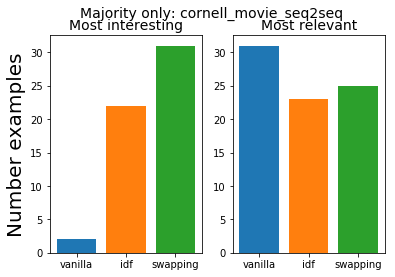

cornell_movie transformer


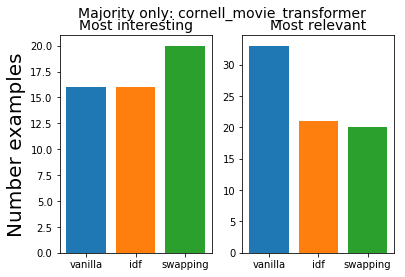

dailydialog seq2seq


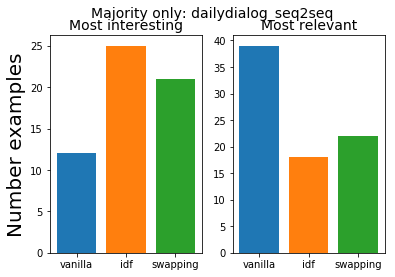

dailydialog transformer


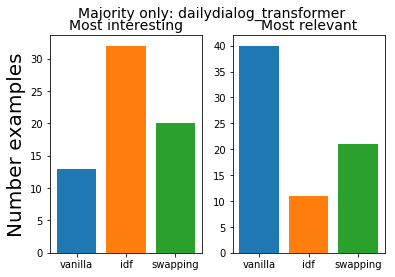

empathetic_dialogues seq2seq


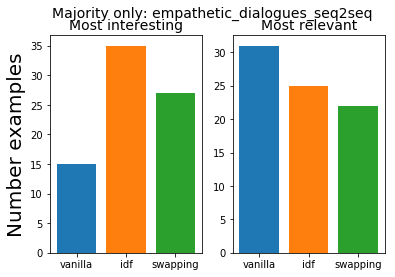

empathetic_dialogues transformer


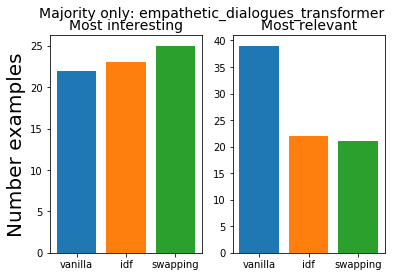

personachat seq2seq


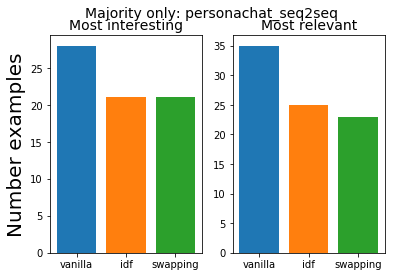

personachat transformer


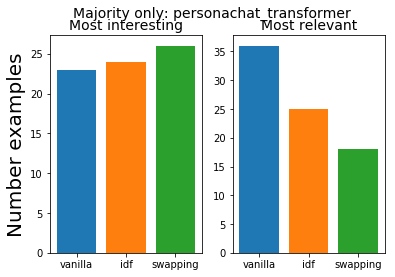

In [210]:
for (dataset, model), setting_df in choice_df.groupby(['dataset', 'model']):
    
    some_int = (~setting_df['none_int'])
    some_rel = (~setting_df['none_rel']) 
    
    int_df = setting_df[some_int]
    rel_df = setting_df[some_rel]
    
    rel_counts = np.zeros(len(method_order))
    int_counts = np.zeros(len(method_order))
    
    for context, ex_df in rel_df.groupby('context'):
        c = Counter(ex_df['most_rel'])
        if c.most_common(1)[0][1] > 1:
            rel_counts[method_order.index(c.most_common(1)[0][0])] += 1
            
    for context, ex_df in int_df.groupby('context'):
        c = Counter(ex_df['most_int'])
        if c.most_common(1)[0][1] > 1:
            int_counts[method_order.index(c.most_common(1)[0][0])] += 1
            
            
    
    print(dataset, model)
    print('=========')
    data_model_key = '%s_%s' % (dataset, model)
    
    fig, ax = plt.subplots(1, 2)
    for m, method in enumerate(method_order): 
        ax[0].bar(m, int_counts[m])
        ax[1].bar(m, rel_counts[m])
     
    ax[0].set_xticks(np.arange(3))
    ax[0].set_xticklabels(method_order)
    ax[0].set_title('Most interesting', fontsize=14)
    ax[0].set_ylabel('Number examples', fontsize=20)

    ax[1].set_title('Most relevant', fontsize=14)
    ax[1].set_xticks(np.arange(3))
    ax[1].set_xticklabels(method_order)
    
    plt.suptitle('Majority only: %s' % (data_model_key,), fontsize=14)
    plt.show()

# Relationship of best and most relevant

In [298]:
print('Percent inputs where most relevant response also chosen as best')
print('(not grouped by example, but "none relevant" removed)')
      
for (dataset, model), setting_df in choice_df.groupby(['dataset', 'model']):
    
    some_rel = (~setting_df['none_rel'])
    df = setting_df[some_rel]
    
    
    print('=========')
    print(dataset, model)

    data_model_key = '%s_%s' % (dataset, model)
    
    cor_mat = np.zeros((1, len(method_order)))
    for ind in df.index:
        most_rel_method = df.loc[ind, 'most_rel']
        j = method_order.index(most_rel_method)
        cor_mat[0, j] += df.loc[ind, most_rel_method] == 1 # ranked best overall. 
    
    print('\t\t %.2f' %(100.0*np.sum(cor_mat)/df.shape[0],))
#     plt.pcolor(cor_mat/df.shape[0], vmin=0, vmax=50)
#     plt.xticks(.5 + np.arange(len(method_order)), method_order)
# #     plt.yticks(.5 + np.arange(len(method_order)), method_order)
#     plt.xlabel('Selected as most relevant')
# #     plt.ylabel('Selected as most interesting')
#     plt.colorbar(label='Percent most relevant and mos i')
#     ind = np.arange(len(method_order))
#     plt.title('%s: Most int==most rel: %d%%' % (data_model_key, 100.0*np.sum(cross_mat[ind,ind])/np.sum(cross_mat)))
#     plt.show()

Percent inputs where most relevant response also chosen as best
(not grouped by example, but "none relevant" removed)
cornell_movie seq2seq
		 90.11
cornell_movie transformer
		 88.93
dailydialog seq2seq
		 87.73
dailydialog transformer
		 89.81
empathetic_dialogues seq2seq
		 89.01
empathetic_dialogues transformer
		 89.66
personachat seq2seq
		 91.10
personachat transformer
		 91.70


# Relationship of when interested and when relevant
There is little consistent relationship across datasets/models, but all have the most interesting match the most relevant < 25% of the time.

cornell_movie seq2seq


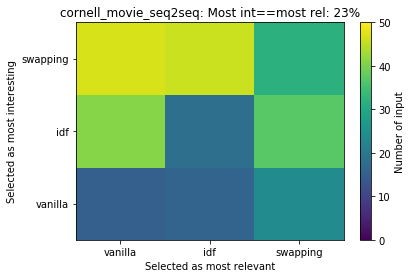

cornell_movie transformer


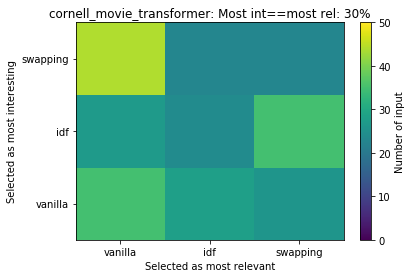

dailydialog seq2seq


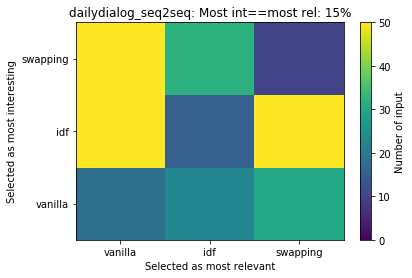

dailydialog transformer


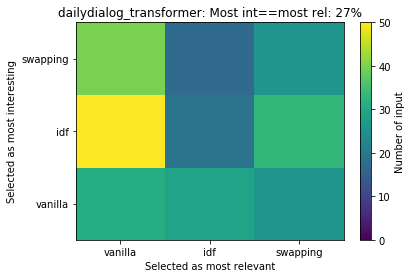

empathetic_dialogues seq2seq


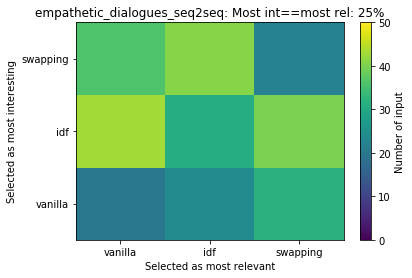

empathetic_dialogues transformer


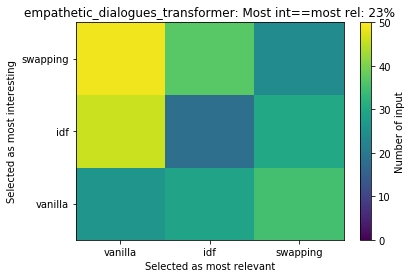

personachat seq2seq


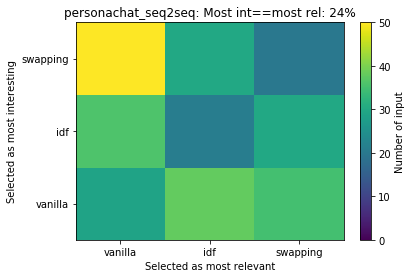

personachat transformer


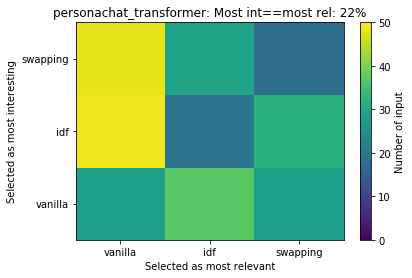

In [397]:
for (dataset, model), setting_df in choice_df.groupby(['dataset', 'model']):
    
    some_int_relevant = ~(setting_df['none_rel'] & setting_df['none_int'])
    df = setting_df[some_int_relevant]
    
    
    print(dataset, model)
    print('=========')
    data_model_key = '%s_%s' % (dataset, model)
    
    cross_mat = np.NaN * np.zeros((len(method_order), len(method_order)))
    for i, m1 in enumerate(method_order):
        for j, m2 in enumerate(method_order):
            cross_mat[i,j] = np.sum((df['most_int'] == m1) & (df['most_rel'] == m2))
            
    plt.pcolor(cross_mat, vmin=0, vmax=50)
    plt.xticks(.5 + np.arange(len(method_order)), method_order)
    plt.yticks(.5 + np.arange(len(method_order)), method_order)
    plt.xlabel('Selected as most relevant')
    plt.ylabel('Selected as most interesting')
    plt.colorbar(label='Number of input')
    ind = np.arange(len(method_order))
    plt.title('%s: Most int==most rel: %d%%' % (data_model_key, 100.0*np.sum(cross_mat[ind,ind])/np.sum(cross_mat)))
    plt.show()

In [259]:
method_order

['vanilla', 'idf', 'swapping']

In [264]:
# choice_df.columns
# task, method, model
choice_df['model'].unique()

array(['seq2seq', 'transformer'], dtype=object)

## Look at distributions of idf generated
We could run tests for distribution shifts, but everything is pretty overlapping, so I'd expect p-values to be very large. 

In [283]:
tasks = ['cornell_movie', 'dailydialog', 'empathetic_dialogues', 'personachat']


### Build dictionaries of idf for each dataset.
idf_dict = {t:{} for t in tasks}
for task in tasks:
    
    tot_doc = open('/data/odemasi/packages/ParlAI/tmp/%s/dict_minfreq_2.tot_doc' % task, 'r').readline()
    tot_doc = float(tot_doc.strip('\n'))
    lines = open('/data/odemasi/packages/ParlAI/tmp/%s/dict_minfreq_2.doc_freq' % task, 'r').readlines()
    
    # build idf dictionary for dataset: 
    for line in lines[4:]:
        tok, ct = line.split('\t')
        idf_dict[task][tok] = np.log(tot_doc/float(ct.strip('\n')))
    
    

### Look at distribution of generated idf for each model/dataset. 

bin_edges = np.arange(0,13,.2)
generated_idf_dist = {t:{m:{} for m in ['seq2seq', 'transformer']} for t in tasks}

for (task, model), df in choice_df.groupby(['dataset', 'model']):
    
    generated_idf_dist[task][model] = np.zeros((len(method_order), len(bin_edges)-1))
    missing_toks = []
    
    for m, method in enumerate(method_order):
        responses = df['resp_%s'%method].values
        idfs_generated = []
        for resp in responses:
            for tok in resp.split(' '):
                try:
                    idfs_generated += [idf_dict[task][tok],]
                except KeyError:
                    missing_toks += [tok,]
        
        generated_idf_dist[task][model][m,:], _ = np.histogram(idfs_generated, bins=bin_edges)
    print('Missing tokens: ', missing_toks)


Missing tokens:  ['@$%#', '@$%#', '@$%#']
Missing tokens:  ['@!%#', '@!%#', '@!%#', '@%!@', '@%!@', '@%!@', '@%!@', '@%!@', '@%!@', '@%!@', '@%!@', '@%!@', '@%!@', '@%!@', '@%!@', '@%!@', '@%!@', '@%!@', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '!#!%', '!#!%', '!#!%']
Missing tokens:  []
Missing tokens:  ['#$!%ens', '#$!%ens', '#$!%ens']
Missing tokens:  ['', '', '', '', '', '', '', '', '']
Missing tokens:  ['', '', '']
Missing tokens:  []
Missing tokens:  []


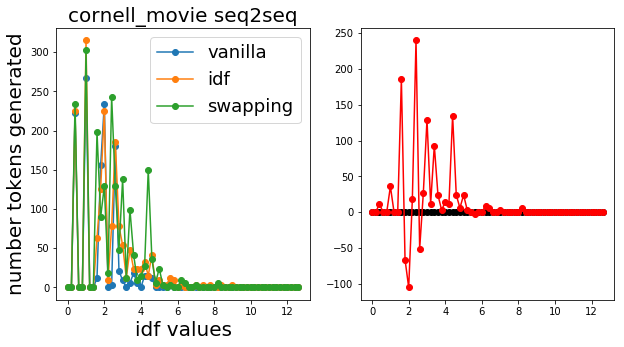

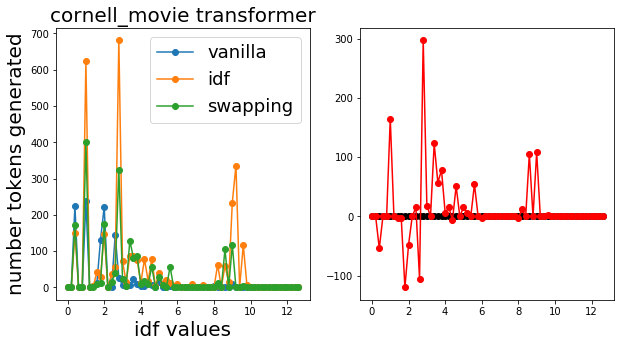

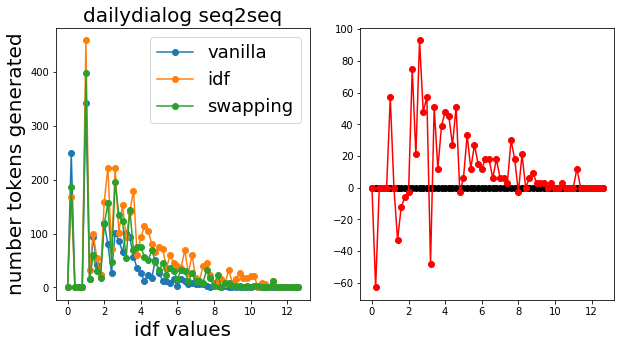

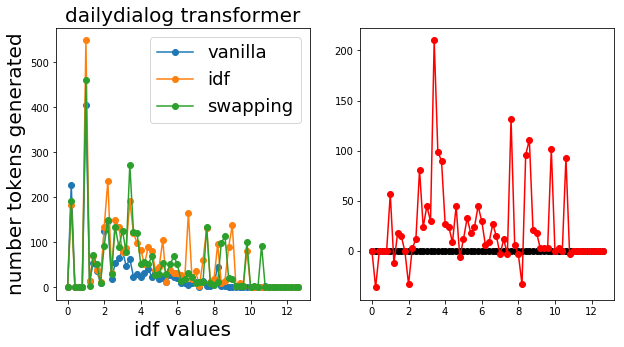

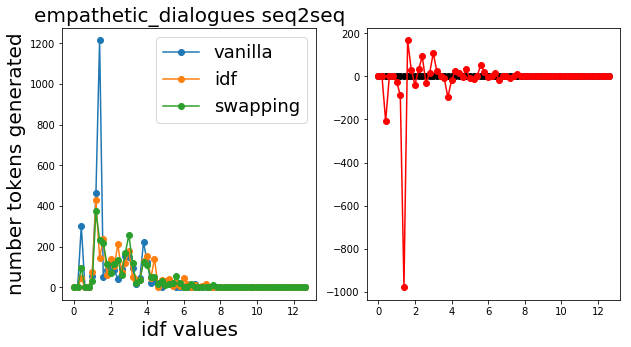

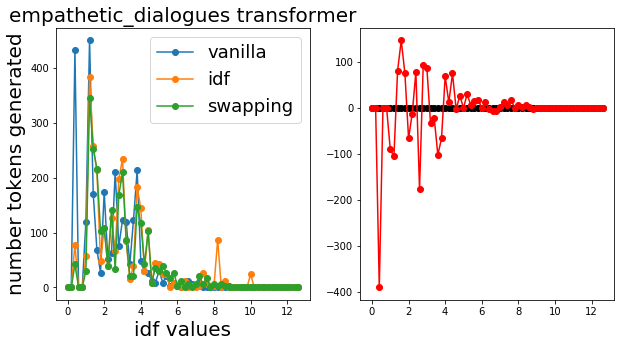

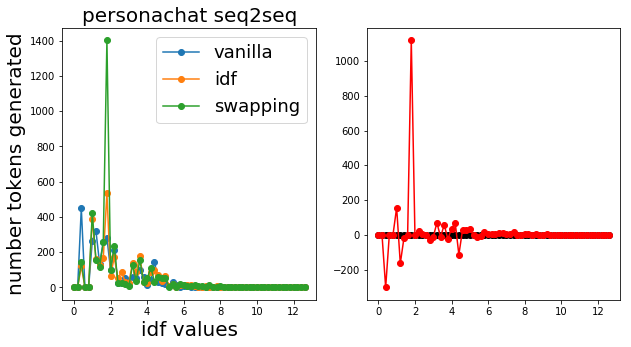

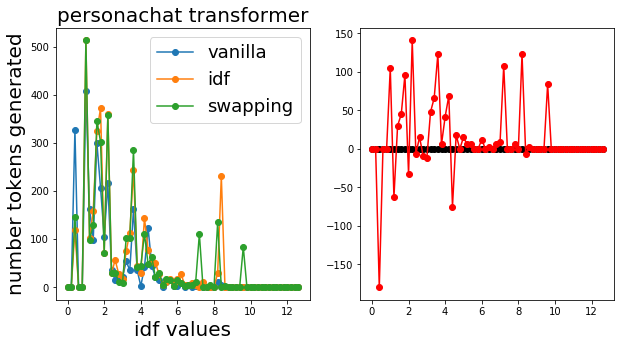

In [354]:
for task in tasks:
    for model in choice_df['model'].unique():
        
        fig, axs = plt.subplots(1,2, figsize=(10,5))
        
        for m, method in enumerate(method_order):
            axs[0].plot(bin_edges[:-1], generated_idf_dist[task][model][m,:], '-o', label=method)

        axs[0].set_title('%s %s' % (task, model), fontsize=20)  
        axs[0].set_ylabel('number tokens generated', fontsize=20)  
        axs[0].legend(fontsize=18)
        axs[0].set_xlabel('idf values', fontsize=20)  
        
        s = method_order.index('swapping')
        v = method_order.index('vanilla')
        axs[1].plot(bin_edges[:-1], 0*bin_edges[:-1], 'ko-')
        axs[1].plot(bin_edges[:-1],  generated_idf_dist[task][model][s,:] - generated_idf_dist[task][model][v,:], 'ro-')
        plt.show()


# Load relevance data

In [788]:
elim_batch_name = 'batches/Batch_3629231_batch_results.csv'
elim_batch_name2 = 'batches/Batch_3636896_batch_results.csv'

# raw_elim_df = pd.read_csv(elim_batch_name)
raw_elim_df = pd.concat([pd.read_csv(elim_batch_name), 
                         pd.read_csv(elim_batch_name2)], axis=0, sort=False).reset_index()


In [789]:
raw_elim_df.shape

(486, 94)

In [791]:
# raw_elim_df['Input.model_1_3']

In [885]:

elim_df = []
for i in raw_elim_df.index:
    row = raw_elim_df.loc[i]
    hit_num = i
    worker_id = row['WorkerId']
    
    for ex in range(10): # given to each turker in a single HIT
        
        model_pieces = row['Input.model_1_%s' % (ex,)].split(' ')
        dataset, model, method = model_pieces
        
        well_formed_score = row['Answer.well_formed_%s' % (ex,)] 
        not_rel = type(row['Answer.check_rel_0_%s' % (ex,)]) == str
        
        message1 = row['Input.msg1_%s' % (ex,)]
        message2 = row['Input.msg2_%s' % (ex,)]
        response = row['Input.resp_1_%s' % (ex,)]
        
        
        elim_df.append([hit_num, worker_id, dataset, model, method, \
                          message1, message2, response, not_rel, well_formed_score])

elim_df = pd.DataFrame(elim_df, columns = ['hit_num', 'worker_id', 'dataset', 'model', 'method', \
                                               'message1', 'message2', 'response', 'not_rel', 'well_score'])

elim_df['context'] = elim_df['message1'] + elim_df['message2']

# remove examples that had an empty message 2: 
elim_df = elim_df[[type(x) == str for x in elim_df['message2']]]

## Variability on warmup question: 

Warmup response:  Cool is football
Fraction flagged not-relevant: 0.00
Mean well-formed score:  2.6857142857142855


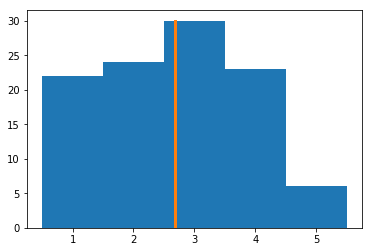

Warmup response:  That's cool!
Fraction flagged not-relevant: 0.00
Mean well-formed score:  4.76595744680851


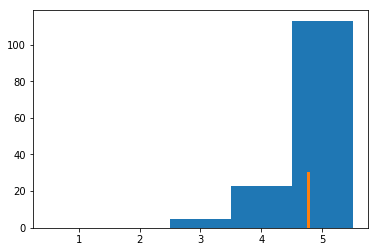

Warmup response:  Yes, I played tennis last week! It was so much fun.
Fraction flagged not-relevant: 0.64
Mean well-formed score:  4.304761904761905


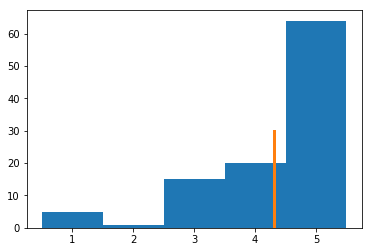

Warmup response:  Yes, football football football football football.
Fraction flagged not-relevant: 0.01
Mean well-formed score:  2.0444444444444443


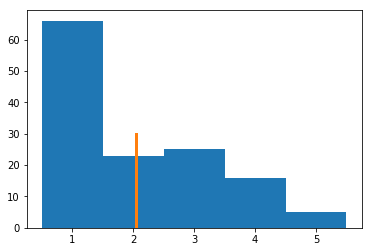

In [803]:
for warmup_resp, df in raw_elim_df.groupby('Input.warmup_response'):
    mean_score = df['Answer.well_formed_warmup'].mean()
    print('Warmup response: ', warmup_resp)
    print('Fraction flagged not-relevant: %.2f' % np.mean([type(x) == str for x in df['Answer.check_rel_1_warmup'].values]))
    print('Mean well-formed score: ', mean_score)
    plt.hist(df['Answer.well_formed_warmup'].values, bins = .5+np.arange(6))
    plt.plot([mean_score, mean_score], [0, 30], linewidth=3)
    plt.show()

In [804]:
raw_elim_df['Answer.optionalfeedback'].values

array(['{}', '{}', '{}', '{}', 'no comments', '{}', '{}', '{}', '{}',
       '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}',
       '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}',
       '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}',
       '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}',
       '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}',
       '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}',
       '{}', '{}', '{}', '{}', '{}', '{}', '{}',
       "for the 4th chat (Chatbot Response: excuse me , can you tell me where my name is liu wei ?), there is missing text where the Person 1's response should be, so I had no way of determining if chatbot response was relevant or not.",
       '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}',
       '{}', '{}', '{}', '{}', '{}',
       'I think relevancy should be on a scale as well as the comprehension, certain examples s

In [805]:
elim_df[:3]

,hit_num,worker_id,dataset,model,method,message1,message2,response,not_rel,well_score,context
0,0,A1PUHCEBSOWETV,personachat,seq2seq,vanilla,i am in the army,oh sounds like fun but very demanding .,what do you do for a living ?,False,2,i am in the armyoh sounds like fun but very de...
1,0,A1PUHCEBSOWETV,cornell_movie,seq2seq,vanilla,~~,we've got such sights to show you --,"oh , no !",False,2,~~we've got such sights to show you --
2,0,A1PUHCEBSOWETV,cornell_movie,seq2seq,swapping,~~,back up.,i 'm sorry .,False,4,~~back up.


In [807]:
for (task, model), df in elim_df.groupby(['dataset', 'model']):
    print(task, model)
    for method, method_df in df.groupby('method'):
#         perc_not_rel = 100.*method_df['not_rel'].mean()
        perc_not_rel = 100.0 * np.mean(method_df.groupby('context')['not_rel'].agg(np.sum)>1)
        well_score = method_df['well_score'].mean()
        below_3 = np.mean(method_df.groupby('context')['well_score'].agg(np.mean) < 3)
        well_std = method_df.groupby('context')['well_score'].agg(np.mean).std()
        print('\t percent not relevant: %.2f \tmean well score (std): %.3f (%.3f) perc<3: %.2f \t %s' % \
                          (perc_not_rel, well_score, well_std, 100.0*below_3, method))
        
        

cornell_movie seq2seq
	 percent not relevant: 18.00 	mean well score (std): 3.957 (0.792) perc<3: 8.00 	 face
	 percent not relevant: 27.00 	mean well score (std): 3.923 (0.704) perc<3: 6.00 	 idf
	 percent not relevant: 27.00 	mean well score (std): 3.927 (0.633) perc<3: 4.00 	 swapping
	 percent not relevant: 16.00 	mean well score (std): 4.143 (0.526) perc<3: 2.00 	 vanilla
dailydialog seq2seq
	 percent not relevant: 32.00 	mean well score (std): 3.373 (1.093) perc<3: 30.00 	 face
	 percent not relevant: 28.00 	mean well score (std): 3.583 (0.949) perc<3: 22.00 	 idf
	 percent not relevant: 21.00 	mean well score (std): 3.907 (0.865) perc<3: 12.00 	 swapping
	 percent not relevant: 14.00 	mean well score (std): 4.087 (0.602) perc<3: 2.00 	 vanilla
empathetic seq2seq
	 percent not relevant: 22.00 	mean well score (std): 3.113 (1.130) perc<3: 44.00 	 face
empathetic_dialogues seq2seq
	 percent not relevant: 23.00 	mean well score (std): 4.083 (0.741) perc<3: 5.00 	 idf
	 percent not r

In [931]:
method_order = ['vanilla', 'swapping', 'idf', 'face']

method_name = {'vanilla':'standard', 
               'swapping':'idf+swap', 
               'idf':'idf', 
               'face': 'face'}

print('Dataset & Method & Percent not relevant & Percent score $<$ 3\\\\ \hline \hline')
for (task, model), df in elim_df.groupby(['dataset', 'model']):
    print('\multirow{4}{*}{\parbox{1.8cm}{\\vspace{.1cm} %s}}' % task)
    
    method_grouped = df.groupby('method')
    for method in method_order:
        
        try: 
            method_df = method_grouped.get_group(method)

            perc_not_rel = 100.0 * np.mean(method_df.groupby('context')['not_rel'].agg(np.sum)>1)
            below_3 = 100.0*np.mean(method_df.groupby('context')['well_score'].agg(np.mean) < 3)
            if method=='face':
                print('\t & %s & %.1f & %.1f \\\\ \\hline' % \
                              (method_name[method], perc_not_rel, below_3))
            else: 
                print('\t & %s & %.1f & %.1f \\\\ ' % \
                              (method_name[method], perc_not_rel, below_3))
        except KeyError: 
            pass
        

Dataset & Method & Percent not relevant & Percent score $<$ 3\\ \hline \hline
\multirow{4}{*}{\parbox{1.8cm}{\vspace{.1cm} cornell_movie}}
	 & standard & 16.0 & 2.0 \\ 
	 & idf+swap & 27.0 & 4.0 \\ 
	 & idf & 27.0 & 6.0 \\ 
	 & face & 18.0 & 8.0 \\ \hline
\multirow{4}{*}{\parbox{1.8cm}{\vspace{.1cm} dailydialog}}
	 & standard & 14.0 & 2.0 \\ 
	 & idf+swap & 21.0 & 12.0 \\ 
	 & idf & 28.0 & 22.0 \\ 
	 & face & 32.0 & 30.0 \\ \hline
\multirow{4}{*}{\parbox{1.8cm}{\vspace{.1cm} empathetic}}
	 & face & 22.0 & 44.0 \\ \hline
\multirow{4}{*}{\parbox{1.8cm}{\vspace{.1cm} empathetic_dialogues}}
	 & standard & 11.0 & 2.0 \\ 
	 & idf+swap & 15.0 & 4.0 \\ 
	 & idf & 23.0 & 5.0 \\ 
\multirow{4}{*}{\parbox{1.8cm}{\vspace{.1cm} personachat}}
	 & standard & 21.0 & 7.0 \\ 
	 & idf+swap & 23.0 & 10.0 \\ 
	 & idf & 21.0 & 8.0 \\ 
	 & face & 29.0 & 42.0 \\ \hline


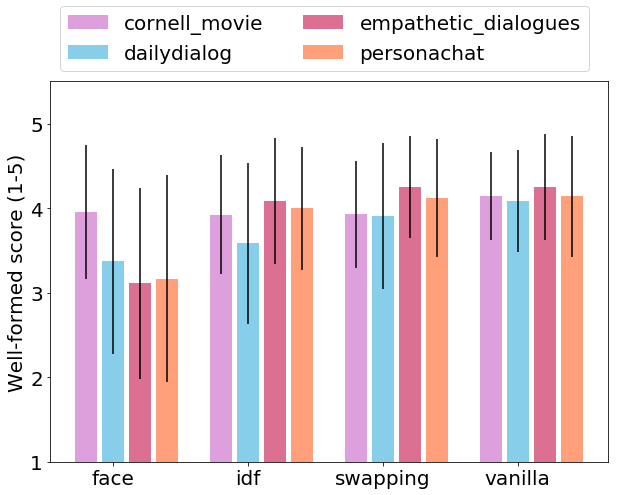

In [809]:
off = 0
method_names = []

fig, ax = plt.subplots(figsize=(10, 10))
dataset_color = {'cornell_movie':'plum',
                'dailydialog':'skyblue',
                'empathetic': 'palevioletred',
                'empathetic_dialogues':'palevioletred',
                'personachat': 'lightsalmon'}
for method, method_df in elim_df.groupby('method'):
    ind = 0
    method_names.append(method)
    for (model, task), df in method_df.groupby(['model', 'dataset']):
        well_score = df['well_score'].mean()
#         well_std = df['well_score'].std() # This is across all inputs, but we want across averged inputs? 
        well_std = df.groupby('context')['well_score'].agg(np.mean).std()
        
        if method == 'vanilla':
            plt.bar(ind + off*5, height=well_score,  yerr=well_std, color=dataset_color[task], label=task)
        else: 
            plt.bar(ind + off*5, height=well_score,  yerr=well_std, color=dataset_color[task])
        ind += 1
        
    off += 1

plt.xticks(1+5*np.arange(4), method_names, fontsize=20)
plt.yticks(np.arange(6), fontsize=20)
plt.ylabel('Well-formed score (1-5)', fontsize=20)     
plt.ylim([1,5.5])
plt.legend()

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0-box.height *.3, box.width, box.height * 0.7])

# Put a legend to the right of the current axis
ax.legend(loc='lower left', bbox_to_anchor=(0, 1), ncol=2, fontsize=20)

plt.show()

In [810]:
# df.groupby('context')['well_score'].agg([np.mean, np.size])#.std()

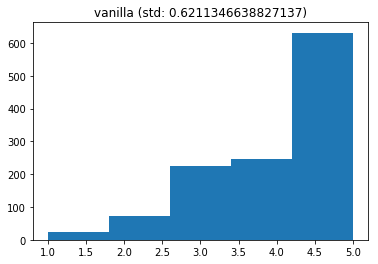

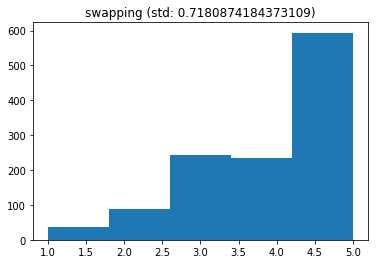

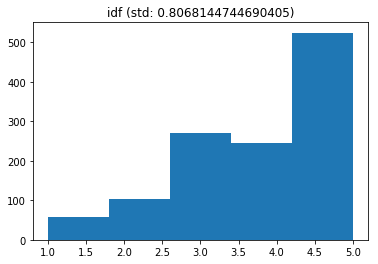

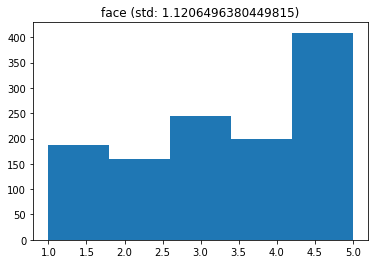

In [811]:
for method in elim_df['method'].unique():
    plt.hist(elim_df.groupby('method').get_group(method)['well_score'].values, bins = 5)
    plt.title('%s (std: %s)' % (method, elim_df.groupby('method').get_group(method).groupby('context')['well_score'].agg(np.mean).std()))
    plt.show()
    

In [812]:
scored_untied_df = []

for (dataset, model, method), setting_df in elim_df.groupby(['dataset', 'model', 'method']):
    for context, df in setting_df.groupby('context'):
        if df.shape[0] !=3: 
            print(dataset, model, method, df.shape)
        scored_untied_df.append([dataset, model, method, context, df['response'].values[0],
                      df['well_score'].mean(),  
                      Counter(df['not_rel'].values).most_common(1)[0][0] == True])
        
scored_untied_df = pd.DataFrame(scored_untied_df, columns = ['dataset', 'model', 'method', 'context', 
                                                             'response', 'avg_well_score', 'not_rel'])
        

In [813]:
for (dataset, model, method), setting_df in elim_df.groupby(['dataset', 'model', 'method']):
    print(dataset, model, method, 'missing: ', 100-len(setting_df.groupby('context').groups))
#     if len(setting_df.groupby('context').groups) < 100:
#         break
#     for context, df in setting_df.groupby('context'):

cornell_movie seq2seq face missing:  0
cornell_movie seq2seq idf missing:  0
cornell_movie seq2seq swapping missing:  0
cornell_movie seq2seq vanilla missing:  0
dailydialog seq2seq face missing:  0
dailydialog seq2seq idf missing:  0
dailydialog seq2seq swapping missing:  0
dailydialog seq2seq vanilla missing:  0
empathetic seq2seq face missing:  0
empathetic_dialogues seq2seq idf missing:  0
empathetic_dialogues seq2seq swapping missing:  0
empathetic_dialogues seq2seq vanilla missing:  0
personachat seq2seq face missing:  0
personachat seq2seq idf missing:  0
personachat seq2seq swapping missing:  0
personachat seq2seq vanilla missing:  0


In [814]:
len(setting_df['context'].unique())

100

# Load Data that Duels Vanilla & IDF

In [48]:
# raw_duel_df = pd.read_csv('batches/Batch_3630895_batch_results.csv')

raw_duel_df = pd.concat([pd.read_csv('../batches/Batch_3630895_batch_results.csv'), 
                        pd.read_csv('../batches/Batch_3636922_batch_results.csv'), 
                        pd.read_csv('../batches/Batch_3638556_batch_results.csv'), 
                        pd.read_csv('../batches/Batch_3638681_batch_results.csv')], axis=0, sort=False).reset_index()


In [49]:
raw_duel_df.shape

(246, 148)

In [50]:
import re
def standardize_profanity(profane_str):
    return re.sub("([#|\$|%|!|&|@])+([#|\$|%|!|&|@]).*([#|\$|%|!|&|@])+", "****", profane_str)

In [51]:
for index, row in raw_duel_df.iterrows():
    for i in range(10):
        msg1 = row['Input.msg1_' + str(i)]
        raw_duel_df.set_value(index, 'Input.msg1_' + str(i), standardize_profanity(str(msg1)))
        
        msg2 = row['Input.msg2_' + str(i)]
        raw_duel_df.set_value(index, 'Input.msg2_' + str(i), standardize_profanity(str(msg2)))

/Users/katie_stasaski/Desktop/tutoring/tutoring/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
/Users/katie_stasaski/Desktop/tutoring/tutoring/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


In [34]:
for ex in raw_duel_df['Input.msg2_5']:
    print(ex)

yes - - and that he ought to be up and around sometime soon.
yes - - and that he ought to be up and around sometime soon.
yes - - and that he ought to be up and around sometime soon.
of course ! everything at helen's is overpriced , and they sell things that you can find at almost every other clothing store ! why didn't you shop around ?
of course ! everything at helen's is overpriced , and they sell things that you can find at almost every other clothing store ! why didn't you shop around ?
of course ! everything at helen's is overpriced , and they sell things that you can find at almost every other clothing store ! why didn't you shop around ?
get off the clark now and wait for me at the airlock.
get off the clark now and wait for me at the airlock.
get off the clark now and wait for me at the airlock.
yeah i am really looking forward to getting him back
yeah i am really looking forward to getting him back
yeah i am really looking forward to getting him back
--we've got to find out w

In [35]:
dueling_methods = ['vanilla', 'idf']

duel_df = []
for i in raw_duel_df.index:
    row = raw_duel_df.loc[i]
    hit_num = i
    worker_id = row['WorkerId']
    
    for ex in range(10): # given to each turker in a single HIT
        
        if np.isnan(row['Answer.best_%s' % ex]): 
            # This may be null from the re-run subset, so skip it (and count after!)
            continue
            
        option_to_method = {}
        method_to_resp = {}
        
        for option in range(1, 2+1):
            
            model_pieces = row['Input.model_%s_%s' % (option, ex)].split(' ')
            dataset, model, method = model_pieces
                
            option_to_method[option] = method
            method_to_resp[method] = row['Input.resp_%s_%s' % (option, ex)]
            
        best_overall = option_to_method[row['Answer.best_%s' % (ex,)]]
        most_interesting = option_to_method[row['Answer.int_%s' % (ex,)]]
        most_relevant = option_to_method[row['Answer.rel_%s' % (ex,)]]
        none_int = type(row['Answer.check_int_%s'% (ex,)]) == str
        none_rel = type(row['Answer.check_rel_%s'% (ex,)]) == str
        message1 = row['Input.msg1_%s' % (ex,)]
        message2 = row['Input.msg2_%s' % (ex,)]
        
        
        duel_df.append([hit_num, worker_id, dataset, model,
                          message1, message2] + \
                        [method_to_resp[x] for x in dueling_methods] + \
                        [best_overall, most_interesting, most_relevant, none_int, none_rel])

duel_df = pd.DataFrame(duel_df, columns = ['hit_num', 'worker_id', 'dataset', \
                                           'model', 'message1', 'message2',] + \
                                           ['response_%s' % x for x in dueling_methods] + \
                                           ['best_overall', 'most_int', 'most_rel', 'none_int', 'none_rel'])

duel_df['context'] = duel_df['message1'] + duel_df['message2']


# remove examples (accidentially included) where message 2 was null
duel_df = duel_df[[type(x) == str for x in duel_df['message2']]]

In [2]:
for ex in duel_df:
    print(ex)

NameError: name 'duel_df' is not defined

In [37]:
duel_df[[type(x) != str for x in duel_df['message2']]].shape

(0, 14)

In [36]:
print(duel_df[[type(x) == str for x in duel_df['message2']]].shape)
print(duel_df['context'].unique().shape)

(2406, 14)
(409,)


In [45]:
for context in duel_df['context'].unique():
    
    if len(duel_df.loc[duel_df['context'] == context]) != 6:
        print(context)
    #print(context)

i cant dance very well because i eat too many ****@insoh okay . what is your fave movie ?
what are we delivering?we're not delivering ****. ruiz is delivering something, and whatever it is is his business.
i cant dance very well because i eat too many ****insoh okay . what is your fave movie ?
~~jesus christ, it's a @****
**** maxine.we wish.
i know this is going to sound ****ist , but i don't think that men should have to give their approval to the mothers of their children .why not ? it's their children , too .
~~jesus christ, it's a ****
~~!@#y, hm? what was i before?
what you say is, "pass the @****ing catsup."pass the ****@ing catsup.
****@ maxine.we wish.
what you say is, "pass the !@#%ing catsup."pass the ****ing catsup.
~~$@%y, hm? what was i before?
i know this is going to sound @%$ist , but i don't think that men should have to give their approval to the mothers of their children .why not ? it's their children , too .
whoa, i made a mistake.  i'm sorry. don't go all protectiv

In [917]:
for (dataset, model), setting_df in duel_df.groupby(['dataset', 'model']):
    print(dataset, model, method, 'missing: ', 100-len(setting_df.groupby('context').groups))

cornell_movie seq2seq idf missing:  0
cornell_movie transformer idf missing:  0
dailydialog seq2seq idf missing:  0
dailydialog transformer idf missing:  0
empathetic_dialogues seq2seq idf missing:  0
empathetic_dialogues transformer idf missing:  0
personachat seq2seq idf missing:  0
personachat transformer idf missing:  0


In [918]:
for context, setting_df in duel_df.groupby('context'):
    if setting_df.shape[0] != 6: 
        print(setting_df.shape[0], context)
#     print(dataset, model, method, 'missing: ', 100-len(setting_df.groupby('context').groups))

3 !#@$ maxine.we wish.
3 $!#@ maxine.we wish.
3 i cant dance very well because i eat too many !%$@insoh okay . what is your fave movie ?
3 i cant dance very well because i eat too many %!@#insoh okay . what is your fave movie ?
3 i know this is going to sound #!$ist , but i don't think that men should have to give their approval to the mothers of their children .why not ? it's their children , too .
3 i know this is going to sound @%$ist , but i don't think that men should have to give their approval to the mothers of their children .why not ? it's their children , too .
3 what are we delivering?we're not delivering #!@%. ruiz is delivering something, and whatever it is is his business.
3 what are we delivering?we're not delivering #%$@. ruiz is delivering something, and whatever it is is his business.
3 what you say is, "pass the !@#%ing catsup."pass the #!$#ing catsup.
3 what you say is, "pass the @!$%ing catsup."pass the #!$@ing catsup.
3 whoa, i made a mistake.  i'm sorry. don't go

In [919]:
raw_duel_df['Answer.optionalfeedback'].values

array(['{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', 'Thank you',
       '{}', '{}', '{}', '{}', '{}', '{}', 'good questions above.', '{}',
       '{}', '{}', '{}', '{}', '{}', '{}', '{}', 'Thank you', '{}', '{}',
       '{}',
       'Most of these are terrible and would not be acceptable in any sort of commercial version of an AI dialog.  These are the kinds of responses I would have expected 20 or 30 years ago, but not today.  Needs work.',
       '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', 'Thank you',
       'No further relevant comment, at this time.', '{}', '{}', '{}',
       '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}',
       'Thank you', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}',
       '{}', '{}', '{}', '{}', '{}', 'Thank you', '{}', '{}', '{}', '{}',
       '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}',
       '{}', '{}', 'Really easy and enjoyable!', '{}', '{}', '{}', '{}',
       '{}', 'None', '{}', '{}', '{}', 

### Look at counts of when rel & int, etc., overall.

In [920]:
for (dataset, model), setting_df in duel_df.groupby(['dataset', 'model']):
    
    print("\n\n%s %s" % (dataset, model))
    print('Counts over all:')
    print('Best overall: ', Counter(setting_df['best_overall']))
    print('Most Interesting: ', Counter(setting_df['most_int']))
    print('Most relevant: ', Counter(setting_df['most_rel']))
    
    a = setting_df['most_rel'] != setting_df['most_int']
    b = setting_df['most_rel'] == setting_df['best_overall']
    print('Fraction most_rel != most_int %.3f' %  np.mean(a))
    print("Fraction most_rel == best %.3f" %  np.mean(b))
    print("Fraction ((most_rel != most_int) & (most_rel == best))/(most_rel != most_int) %.3f" % \
          (np.sum(a&b) / np.sum(a)))
    
    



cornell_movie seq2seq
Counts over all:
Best overall:  Counter({'vanilla': 164, 'idf': 136})
Most Interesting:  Counter({'idf': 151, 'vanilla': 149})
Most relevant:  Counter({'vanilla': 155, 'idf': 145})
Fraction most_rel != most_int 0.487
Fraction most_rel == best 0.697
Fraction ((most_rel != most_int) & (most_rel == best))/(most_rel != most_int) 0.788


cornell_movie transformer
Counts over all:
Best overall:  Counter({'vanilla': 164, 'idf': 136})
Most Interesting:  Counter({'idf': 159, 'vanilla': 141})
Most relevant:  Counter({'vanilla': 169, 'idf': 131})
Fraction most_rel != most_int 0.520
Fraction most_rel == best 0.690
Fraction ((most_rel != most_int) & (most_rel == best))/(most_rel != most_int) 0.795


dailydialog seq2seq
Counts over all:
Best overall:  Counter({'vanilla': 158, 'idf': 142})
Most Interesting:  Counter({'vanilla': 150, 'idf': 150})
Most relevant:  Counter({'vanilla': 161, 'idf': 139})
Fraction most_rel != most_int 0.517
Fraction most_rel == best 0.670
Fraction ((

### Look at counts when total crap is removed. 

In [921]:
for (dataset, model), setting_df in duel_df.groupby(['dataset', 'model']):
    
    print("\n\n%s %s" % (dataset, model))
    print('Counts with crap removed:')
    print('Best overall with not relevant and not interesting removed: ', 
          Counter(setting_df['best_overall'][~(setting_df['none_int'] & setting_df['none_rel'])]), 
          ' (%s removed)' % np.sum(setting_df['none_int'] & setting_df['none_rel']))

    print('Most int with not interesting removed: ', 
          Counter(setting_df['most_int'][~setting_df['none_int']]), 
          ' (%s removed)' % np.sum(setting_df['none_int']))

    print('Most relevant with not relevant removed: ', 
          Counter(setting_df['most_rel'][~setting_df['none_rel']]), 
          ' (%s removed)' % np.sum(setting_df['none_rel']))



cornell_movie seq2seq
Counts with crap removed:
Best overall with not relevant and not interesting removed:  Counter({'vanilla': 154, 'idf': 124})  (22 removed)
Most int with not interesting removed:  Counter({'idf': 127, 'vanilla': 124})  (49 removed)
Most relevant with not relevant removed:  Counter({'vanilla': 128, 'idf': 116})  (56 removed)


cornell_movie transformer
Counts with crap removed:
Best overall with not relevant and not interesting removed:  Counter({'vanilla': 149, 'idf': 125})  (26 removed)
Most int with not interesting removed:  Counter({'idf': 124, 'vanilla': 114})  (62 removed)
Most relevant with not relevant removed:  Counter({'vanilla': 131, 'idf': 105})  (64 removed)


dailydialog seq2seq
Counts with crap removed:
Best overall with not relevant and not interesting removed:  Counter({'vanilla': 143, 'idf': 137})  (20 removed)
Most int with not interesting removed:  Counter({'idf': 137, 'vanilla': 121})  (42 removed)
Most relevant with not relevant removed:  Cou

In [922]:
duel_df[:3]

,hit_num,worker_id,dataset,model,message1,message2,response_vanilla,response_idf,best_overall,most_int,most_rel,none_int,none_rel,context
0,0,A2FCT2TWW60S1S,dailydialog,seq2seq,~~,"excuse me , sir , do you know what time it is ?","yes , sir .","i 'm sorry , sir . i 'm sorry to hear that the...",idf,vanilla,idf,False,False,"~~excuse me , sir , do you know what time it is ?"
1,0,A2FCT2TWW60S1S,empathetic_dialogues,seq2seq,praise god man! he really is amazing and we sh...,especially since he takes care of us even thou...,i do n't blame you .,it 's nice to have a wonderful time with him !,idf,vanilla,vanilla,True,False,praise god man! he really is amazing and we sh...
2,0,A2FCT2TWW60S1S,empathetic_dialogues,seq2seq,~~,"i like being alone, but not feeling bad when n...",i 'm sorry to hear that .,why did you move back ?,idf,vanilla,vanilla,False,False,"~~i like being alone, but not feeling bad when..."


In [923]:
duel_untied_df = []

for (dataset, model), setting_df in duel_df.groupby(['dataset', 'model']):
    for context, df in setting_df.groupby('context'):
        duel_untied_df.append([dataset, model, context, 
                              Counter(df['best_overall'].values).most_common(1)[0][0],
                              Counter(df['most_rel'].values).most_common(1)[0][0],
                              Counter(df['most_int'].values).most_common(1)[0][0], 
                              Counter(df['none_rel'].values).most_common(1)[0][0] == True, 
                              Counter(df['none_int'].values).most_common(1)[0][0] == True])
duel_untied_df = pd.DataFrame(duel_untied_df, columns = ['dataset', 'model', 'context', 'best_overall', 
                                                        'most_rel', 'most_int', 'none_rel', 'none_int'])

In [924]:
print('Counts over examples (i.e., tie-broken):')

for (dataset, model), setting_df in duel_untied_df.groupby(['dataset', 'model']):
    
    print("\n\n%s %s" % (dataset, model))
    print('Best overall: ', Counter(setting_df['best_overall']))
    print('Most Interesting: ', Counter(setting_df['most_int']))
    print('Most relevant: ', Counter(setting_df['most_rel']))
    
    print('Fraction most_rel != most_int %.3f' %  np.mean(setting_df['most_rel'] != setting_df['most_int']))
    print("Fraction most_rel == best %.3f" %  np.mean(setting_df['most_rel'] == setting_df['best_overall']))

Counts over examples (i.e., tie-broken):


cornell_movie seq2seq
Best overall:  Counter({'vanilla': 60, 'idf': 40})
Most Interesting:  Counter({'vanilla': 52, 'idf': 48})
Most relevant:  Counter({'vanilla': 56, 'idf': 44})
Fraction most_rel != most_int 0.500
Fraction most_rel == best 0.680


cornell_movie transformer
Best overall:  Counter({'vanilla': 55, 'idf': 45})
Most Interesting:  Counter({'idf': 55, 'vanilla': 45})
Most relevant:  Counter({'vanilla': 60, 'idf': 40})
Fraction most_rel != most_int 0.570
Fraction most_rel == best 0.690


dailydialog seq2seq
Best overall:  Counter({'vanilla': 52, 'idf': 48})
Most Interesting:  Counter({'idf': 52, 'vanilla': 48})
Most relevant:  Counter({'vanilla': 57, 'idf': 43})
Fraction most_rel != most_int 0.490
Fraction most_rel == best 0.650


dailydialog transformer
Best overall:  Counter({'vanilla': 57, 'idf': 43})
Most Interesting:  Counter({'vanilla': 52, 'idf': 48})
Most relevant:  Counter({'vanilla': 58, 'idf': 42})
Fraction most_rel != mo

In [925]:
print('Counts with crap removed:')

for (dataset, model), setting_df in duel_untied_df.groupby(['dataset', 'model']):
    
    print("\n\n%s %s" % (dataset, model))
    print('Best overall with not relevant and not interesting removed: ', 
          Counter(setting_df['best_overall'][~(setting_df['none_int'] & setting_df['none_rel'])]), 
          ' (%s removed)' % np.sum(setting_df['none_int'] & setting_df['none_rel']))

    print('Most int with not interesting removed: ', 
          Counter(setting_df['most_int'][~setting_df['none_int']]), 
          ' (%s removed)' % np.sum(setting_df['none_int']))

    print('Most relevant with not relevant removed: ', 
          Counter(setting_df['most_rel'][~setting_df['none_rel']]), 
          ' (%s removed)' % np.sum(setting_df['none_rel']))

Counts with crap removed:


cornell_movie seq2seq
Best overall with not relevant and not interesting removed:  Counter({'vanilla': 60, 'idf': 38})  (2 removed)
Most int with not interesting removed:  Counter({'vanilla': 49, 'idf': 43})  (8 removed)
Most relevant with not relevant removed:  Counter({'vanilla': 54, 'idf': 40})  (6 removed)


cornell_movie transformer
Best overall with not relevant and not interesting removed:  Counter({'vanilla': 54, 'idf': 45})  (1 removed)
Most int with not interesting removed:  Counter({'idf': 46, 'vanilla': 41})  (13 removed)
Most relevant with not relevant removed:  Counter({'vanilla': 53, 'idf': 39})  (8 removed)


dailydialog seq2seq
Best overall with not relevant and not interesting removed:  Counter({'vanilla': 49, 'idf': 48})  (3 removed)
Most int with not interesting removed:  Counter({'idf': 51, 'vanilla': 46})  (3 removed)
Most relevant with not relevant removed:  Counter({'vanilla': 54, 'idf': 41})  (5 removed)


dailydialog transformer
Bes

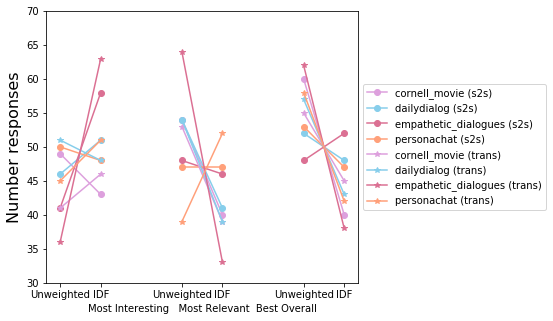

In [926]:
fig, ax = plt.subplots(figsize=(7,5))

for (model, dataset), setting_df in duel_untied_df.groupby(['model', 'dataset']):
    
    c_best = Counter(setting_df['best_overall'])
    c_int = Counter(setting_df['most_int'][~setting_df['none_int']])
    c_rel = Counter(setting_df['most_rel'][~setting_df['none_rel']])
    
    if model== 'transformer':
        sym = '*'
        mod='trans'
    else: 
        sym='o'
        mod='s2s'
    ax.plot([1, 2], [c_int['vanilla'], c_int['idf']],'%s-'%sym, label='%s (%s)' % (dataset, mod), color=dataset_color[dataset])
    ax.plot([4, 5], [c_rel['vanilla'], c_rel['idf']],'%s-'%sym, color=dataset_color[dataset])
    ax.plot([7, 8], [c_best['vanilla'], c_best['idf']],'%s-'%sym, color=dataset_color[dataset])

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plt.legend()
plt.xlabel('Most Interesting   Most Relevant  Best Overall',fontsize=10)
plt.ylabel('Number responses',fontsize=16)
plt.xticks([1,2, 4,5, 7,8], ['Unweighted', 'IDF', 'Unweighted', 'IDF','Unweighted', 'IDF'])
plt.ylim([30,70])
plt.show()

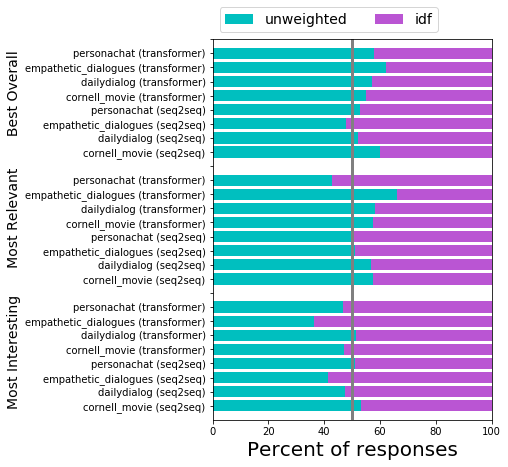

In [927]:
fig, ax = plt.subplots(figsize=(5,10))
h = 0
plt.plot([50,50],[-1, 27], color='grey', linewidth=3)

ylabels = []
for (model, dataset), setting_df in duel_untied_df.groupby(['model', 'dataset']):
    
    c_best = Counter(setting_df['best_overall'])
    c_int = Counter(setting_df['most_int'][~setting_df['none_int']])
    c_rel = Counter(setting_df['most_rel'][~setting_df['none_rel']])
    
    d = float(sum(c_int.values()))
    
    plt.barh(h, 100.*c_int['vanilla']/d, left=0, color='c')
    plt.barh(h, 100.*c_int['idf']/d, left=100.*c_int['vanilla']/d, color='mediumorchid')
    
    
    d = float(sum(c_rel.values()))
    plt.barh(h+9, 100.*c_rel['vanilla']/d, left=0, color='c')
    plt.barh(h+9, 100.*c_rel['idf']/d, left=100.*c_rel['vanilla']/d, color='mediumorchid')
    
    
    d = float(sum(c_best.values()))
    if model=='transformer' and dataset=='personachat':
        plt.barh(h+18, 100.*c_best['vanilla']/d, left=0, color='c', label='unweighted')
        plt.barh(h+18, 100.*c_best['idf']/d, left=100.*c_best['vanilla']/d, color='mediumorchid', label='idf')
    else:
        plt.barh(h+18, 100.*c_best['vanilla']/d, left=0, color='c')
        plt.barh(h+18, 100.*c_best['idf']/d, left=100.*c_best['vanilla']/d, color='mediumorchid')
    
    ylabels.append('%s (%s)' % (dataset, model))
    
#     plt.plot([3, 4], [c_rel['vanilla'], c_rel['idf']],'o-')
#     plt.plot([5, 6], [c_best['vanilla'], c_best['idf']],'o-')
    h += 1
    
# plt.legend()
plt.ylabel('Most Interesting      Most Relevant       Best Overall', fontsize=14)
plt.xlabel('Percent of responses',fontsize=20)
# plt.xticks(1+np.arange(6), ['Unweighted', 'IDF', 'Unweighted', 'IDF','Unweighted', 'IDF'])
plt.yticks(np.arange(3*(len(ylabels)+1)), ylabels + [''] + ylabels + [''] + ylabels)
plt.xlim([0,100])
plt.ylim([-1, 26])

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0-box.height *.3, box.width, box.height * 0.7])

# Put a legend to the right of the current axis
ax.legend(loc='lower left', bbox_to_anchor=(0, 1), ncol=2, fontsize=14)


plt.show()

In [929]:
# scored_untied_df.merge(duel_untied_df)
t2 = duel_untied_df[:5]
t2

,dataset,model,context,best_overall,most_rel,most_int,none_rel,none_int
0,cornell_movie,seq2seq,!#@$ maxine.we wish.,vanilla,vanilla,vanilla,False,False
1,cornell_movie,seq2seq,-- there's no time ---- we'll explain it --,idf,idf,idf,True,False
2,cornell_movie,seq2seq,"all right, i guess. one hell of a hangover. ...",idf,idf,vanilla,False,False
3,cornell_movie,seq2seq,"all right. let me out.you know, new hell reall...",vanilla,vanilla,idf,False,False
4,cornell_movie,seq2seq,and the beauty of it is she'll never have to k...,vanilla,idf,vanilla,False,False


In [882]:
t1 = scored_untied_df[scored_untied_df['method'] == 'vanilla'][:5]
t1

,dataset,model,method,context,response,avg_well_score,not_rel
300,cornell_movie,seq2seq,vanilla,!#@$ maxine.we wish.,and you 're not gon na do it .,3.666667,False
301,cornell_movie,seq2seq,vanilla,-- there's no time ---- we'll explain it --,-- i --,2.666667,False
302,cornell_movie,seq2seq,vanilla,"all right, i guess. one hell of a hangover. ...",i do n't know .,3.666667,False
303,cornell_movie,seq2seq,vanilla,"all right. let me out.you know, new hell reall...",yeah .,4.000000,False
304,cornell_movie,seq2seq,vanilla,and the beauty of it is she'll never have to k...,so ?,4.666667,False


In [883]:
t3 = t1.merge(t2, on=['dataset', 'model', 'context'], how='left')
t3

,dataset,model,method,context,response,avg_well_score,not_rel,best_overall,most_rel,most_int,none_rel,none_int
0,cornell_movie,seq2seq,vanilla,!#@$ maxine.we wish.,and you 're not gon na do it .,3.666667,False,vanilla,vanilla,vanilla,False,False
1,cornell_movie,seq2seq,vanilla,-- there's no time ---- we'll explain it --,-- i --,2.666667,False,idf,idf,idf,True,False
2,cornell_movie,seq2seq,vanilla,"all right, i guess. one hell of a hangover. ...",i do n't know .,3.666667,False,idf,idf,vanilla,False,False
3,cornell_movie,seq2seq,vanilla,"all right. let me out.you know, new hell reall...",yeah .,4.000000,False,vanilla,vanilla,idf,False,False
4,cornell_movie,seq2seq,vanilla,and the beauty of it is she'll never have to k...,so ?,4.666667,False,vanilla,idf,vanilla,False,False


In [894]:
t3[t3['method'] == t3['best_overall']]['avg_well_score'].mean()

4.111111111111111